# Group 2 Credit Card Report

by 
Ajay Krishnan 400351861
Jieyang Shi 400486491
Warren Pulling 400329304
Yidi Geng 400423487

We want to understand if we can make any statistically meaningful inferences. We begin our journey by assuming the base presumptions are satisfied.
  
Our general approach is as follows:
1. We set up a KNN and logistic regression model for classification as functions. We follow the approach discussed in class.
2. We review the data and perform some data cleanup
3. We visualize and describe each input to the model to understand our data profile.
4. We run the KNN and logistic regression models. Since we have powerful computers at our disposal, we go ahead and run it for every single permutation of parameters to see what produces the best result. *It takes a long time to run, and many of the combinations, expectedly, produce non-sensical results as reflected in python warnings.
5. We then see if a model based on a decision tree would be insightful.





## Model Definition


In [1]:
import pandas as pd


def load_data():
    return pd.read_csv('credit.csv')


In [2]:
def clean_data(data_frame):
    # missing values
    data = data_frame.dropna()

    # typo in data
    data['education'].replace("univeristy", "university", inplace=True)
    data['education'].replace("highschool", "high school", inplace=True)

    # one-hot encoding
    education_onehot = pd.get_dummies(data['education'])
    gender_onehot = pd.get_dummies(data['gender'])
    marital_onehot = pd.get_dummies(data['marital'])

    data = pd.concat(
        [data, education_onehot, gender_onehot, marital_onehot], axis=1)
    data.drop(['education', 'gender', 'marital'], axis=1, inplace=True)

    return data


In [3]:
import itertools


def get_combinations_for(input_parameters):
    input_parameters = input_parameters.drop('id', 'default')
    combinations = sum([list(map(list, itertools.combinations(
        input_parameters, i))) for i in range(len(input_parameters) + 1)], [])
    combinations.pop(0)  # remove empty array (0 elements)
    return combinations


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


def run_knn_for(data, input_combination, num_neighbours):

    X = data[[*input_combination]].values
    y = data['default'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=420)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    classifier = KNeighborsClassifier(n_neighbors=num_neighbours)
    classifier.fit(X_train, y_train)

    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    pos_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pos_prob)
    plt.subplot(2,1,1)
    plt.plot(fpr, tpr)
    plt.title('KNN ROC curve for default classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout(pad=4)
    plt.grid()

    y_pred = classifier.predict(X_test)
    return classification_report(y_test, y_pred)
   
    


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def run_logistic_regression_for(data, input_combination):
    X = data[[*input_combination]].values
    y = data['default'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=420)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    pos_prob = log_reg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pos_prob)
    plt.subplot(2,1,2)
    plt.plot(fpr, tpr)
    plt.title('Logistic ROC curve for default classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    
    y_pred = log_reg.predict(X_test)

    return classification_report(y_test, y_pred)


# Data analysis and visualization

In [6]:
data = load_data()

obj_var = data[['credit']]. groupby([data['education']])
obj_var.mean()
# to prove that people have higher level of education have higher credit limit


,credit
education,
graduate school,213153.546672
highschool,127739.555556
univeristy,147748.232578


In [7]:
obj_var = data[['credit']]. groupby([data['gender']])
obj_var.mean()
# on average, female have higher credit limit than man


,credit
gender,
Female,170626.336138
Male,164246.019870


In [8]:
obj_var = data[['delayed']]. groupby([data['education']])
obj_var.mean()
# to prove that people have higher level of education have less times of delay


,delayed
education,
graduate school,1.279746
highschool,2.062055
univeristy,1.907950


In [9]:
obj_var = data[['delayed']]. groupby([data['gender']])
obj_var.mean()
# on average, female have less time of delay than man


,delayed
gender,
Female,1.559472
Male,1.929417


In [10]:
default = data[data['default'] == 1]
default


,id,credit,delayed,amount,gender,education,age,marital,default
0,25780,180000,2,699,Female,graduate school,39,married,1.0
8,17610,140000,0,684372,Female,univeristy,24,single,1.0
10,18641,450000,1,0,Female,highschool,56,married,1.0
17,11679,390000,0,764871,Female,highschool,28,married,1.0
19,16387,360000,0,0,Female,highschool,50,married,1.0
...,...,...,...,...,...,...,...,...,...
29143,27181,500000,0,5222,Male,graduate school,40,married,1.0
29144,28284,50000,0,241130,Female,univeristy,24,single,1.0
29145,3032,30000,0,27560,Female,univeristy,23,single,1.0
29156,6308,50000,2,278977,Female,highschool,47,married,1.0


In [11]:
not_default = data[data['default'] == 0]
not_default


,id,credit,delayed,amount,gender,education,age,marital,default
1,7679,50000,0,15925,Female,graduate school,25,single,0.0
2,19690,210000,1,0,Male,univeristy,35,single,0.0
3,906,50000,0,26889,Female,univeristy,38,married,0.0
4,191,50000,4,276076,Female,univeristy,24,single,0.0
5,6396,200000,0,0,Female,univeristy,26,single,0.0
...,...,...,...,...,...,...,...,...,...
29157,6368,180000,0,76899,Female,univeristy,36,married,0.0
29158,1903,50000,0,78568,Female,highschool,47,married,0.0
29159,3008,290000,0,1808295,Female,univeristy,34,single,0.0
29160,26638,500000,1,0,Female,graduate school,44,married,0.0


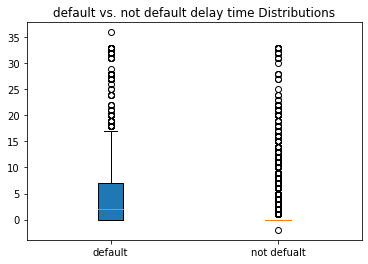

In [12]:
import matplotlib.pyplot as plt
plt.boxplot([default['delayed'], not_default['delayed']],
            patch_artist=True, labels=['default', 'not defualt'])
plt.title('default vs. not default delay time Distributions')
plt.show()
# prove that higher times of delay will lead to credit default


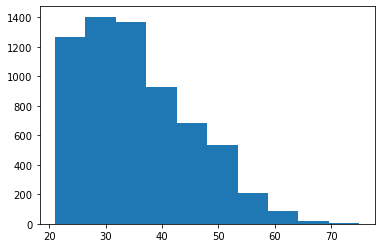

In [13]:
plt.hist(default['age'], bins=10)
plt.show()
# people between 20 and 35 are most likely to default. After 35, the older, the less likely


In [14]:
data


,id,credit,delayed,amount,gender,education,age,marital,default
0,25780,180000,2,699,Female,graduate school,39,married,1.0
1,7679,50000,0,15925,Female,graduate school,25,single,0.0
2,19690,210000,1,0,Male,univeristy,35,single,0.0
3,906,50000,0,26889,Female,univeristy,38,married,0.0
4,191,50000,4,276076,Female,univeristy,24,single,0.0
...,...,...,...,...,...,...,...,...,...
29158,1903,50000,0,78568,Female,highschool,47,married,0.0
29159,3008,290000,0,1808295,Female,univeristy,34,single,0.0
29160,26638,500000,1,0,Female,graduate school,44,married,0.0
29161,3287,80000,5,19302,Female,graduate school,32,married,1.0


In [15]:
# Age Outlier
data['age'].max()


232

In [16]:
# Identifying row with bad data

data[data['age'] == 232]


,id,credit,delayed,amount,gender,education,age,marital,default
24373,13273,180000,0,47837,Female,graduate school,232,single,0.0


In [17]:
# Deleting bad row

data.drop(24373, inplace=True)


In [18]:
# Confirming it was removed

data['age'].max()


79

In [19]:
# Seperating Data by Age

age20to29 = data[(data['age'] < 30) & (data['age'] > 19)]
age30to39 = data[(data['age'] < 40) & (data['age'] > 29)]
age40to49 = data[(data['age'] < 50) & (data['age'] > 39)]
age50to59 = data[(data['age'] < 60) & (data['age'] > 49)]
age60to69 = data[(data['age'] < 70) & (data['age'] > 59)]
age70to79 = data[(data['age'] < 80) & (data['age'] > 69)]


In [20]:
# Pulling out the defaults in each age group

age20to29_dflt = data[(data['age'] < 30) & (
    data['age'] > 19) & (data['default'] == 1)]
age30to39_dflt = data[(data['age'] < 40) & (
    data['age'] > 29) & (data['default'] == 1)]
age40to49_dflt = data[(data['age'] < 50) & (
    data['age'] > 39) & (data['default'] == 1)]
age50to59_dflt = data[(data['age'] < 60) & (
    data['age'] > 49) & (data['default'] == 1)]
age60to69_dflt = data[(data['age'] < 70) & (
    data['age'] > 59) & (data['default'] == 1)]
age70to79_dflt = data[(data['age'] < 80) & (
    data['age'] > 69) & (data['default'] == 1)]


In [21]:
# importing matplot


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


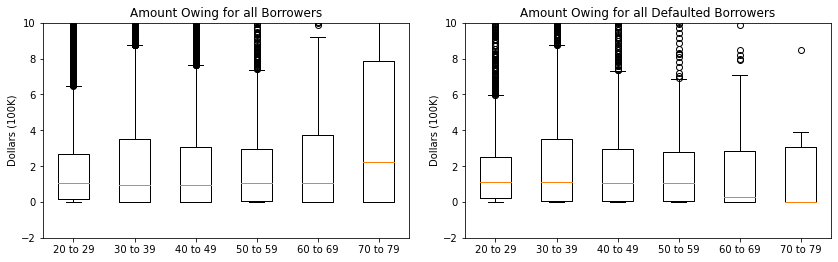

In [22]:
# Age Box Plot Visualization
# Divided by 100000 to better show distribution

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot([age20to29['amount']/100000, age30to39['amount']/100000, age40to49['amount']/100000,
            age50to59['amount']/100000, age60to69['amount']/100000, age70to79['amount']/100000],
            labels=['20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79'])
plt.ylim(-2, 10)
plt.ylabel('Dollars (100K)')
plt.title('Amount Owing for all Borrowers')
plt.subplot(1, 2, 2)
plt.boxplot([age20to29_dflt['amount']/100000, age30to39_dflt['amount']/100000, age40to49_dflt['amount']/100000,
            age50to59_dflt['amount']/100000, age60to69_dflt['amount']/100000, age70to79_dflt['amount']/100000],
            labels=['20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79'])
plt.ylim(-2, 10)
plt.ylabel('Dollars (100K)')
plt.tight_layout(pad=2)
plt.title('Amount Owing for all Defaulted Borrowers')
plt.show()


Box plots show similar mean debt amongst all age groups except 70 -79 year olds. However this was a smaller sample size as there were only 25 borrowers

In [23]:
# removes scientific notation from describe

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [24]:
# reviewing age group data

age20to29_dflt['amount'].describe()


count      2174.00
mean     206527.30
std      294610.58
min           0.00
25%       22735.75
50%      109369.00
75%      252876.25
max     2851153.00
Name: amount, dtype: float64

In [25]:
age30to39_dflt['amount'].describe()


count      2255.00
mean     265933.01
std      393299.29
min           0.00
25%        3227.50
50%      112277.00
75%      352919.50
max     2691482.00
Name: amount, dtype: float64

In [26]:
age40to49_dflt['amount'].describe()


count      1433.00
mean     258758.21
std      411940.59
min           0.00
25%        4933.00
50%      104343.00
75%      296489.00
max     2995825.00
Name: amount, dtype: float64

In [27]:
age50to59_dflt['amount'].describe()


count       553.00
mean     240840.42
std      405352.49
min           0.00
25%        4760.00
50%      105467.00
75%      280055.00
max     3017490.00
Name: amount, dtype: float64

In [28]:
age60to69_dflt['amount'].describe()


count        88.00
mean     241871.68
std      415951.91
min           0.00
25%           0.00
50%       29161.00
75%      287221.75
max     2114664.00
Name: amount, dtype: float64

In [29]:
age70to79_dflt['amount'].describe()

count        7.00
mean    208920.29
std     320999.07
min          0.00
25%          0.00
50%          0.00
75%     306714.50
max     849013.00
Name: amount, dtype: float64

In [30]:
# sorting data by education
data = clean_data(data)
gs = data[(data['graduate school'] == 1)]
hs = data[(data['high school'] == 1)]
uni = data[(data['university'] == 1)]


/var/folders/qy/wdwpghvx2sz1ycr4909krdy40000gn/T/ipykernel_5595/3977249906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'].replace("univeristy", "university", inplace=True)
/var/folders/qy/wdwpghvx2sz1ycr4909krdy40000gn/T/ipykernel_5595/3977249906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'].replace("highschool", "high school", inplace=True)


In [31]:
gs_dflt = data[(data['graduate school'] == 1) & (data['default'] == 1)]
hs_dflt = data[(data['high school'] == 1) & (data['default'] == 1)]
uni_dflt = data[(data['university'] == 1) & (data['default'] == 1)]


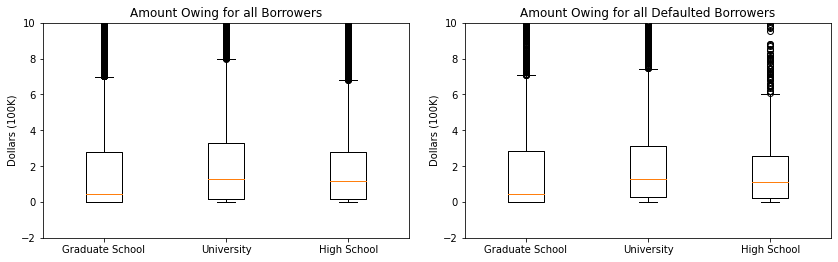

In [32]:
# plotting box plots for education and default

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot([gs['amount']/100000, uni['amount']/100000, hs['amount']/100000],
            labels=['Graduate School', 'University', 'High School'])
plt.ylim(-2, 10)
plt.ylabel('Dollars (100K)')
plt.title('Amount Owing for all Borrowers')
plt.subplot(1, 2, 2)
plt.boxplot([gs_dflt['amount']/100000, uni_dflt['amount']/100000, hs_dflt['amount']/100000],
            labels=['Graduate School', 'University', 'High School'])
plt.ylim(-2, 10)
plt.ylabel('Dollars (100K)')
plt.tight_layout(pad=2)
plt.title('Amount Owing for all Defaulted Borrowers')
plt.show()


Box plots show slight variation in the debt for the borrowers with university having the highest avg debt for all borrowers and defaults

In [33]:
# reviewing education level data

gs_dflt['amount'].describe()


count      2018.00
mean     238347.08
std      406896.91
min           0.00
25%         390.00
50%       47094.50
75%      282848.00
max     3017490.00
Name: amount, dtype: float64

In [34]:
uni_dflt['amount'].describe()


count      3281.00
mean     257100.00
std      368985.05
min           0.00
25%       29516.00
50%      127597.00
75%      314834.00
max     2995825.00
Name: amount, dtype: float64

In [35]:
hs_dflt['amount'].describe()


count      1204.00
mean     207474.17
std      299735.89
min           0.00
25%       24386.00
50%      113946.00
75%      257563.25
max     2849365.00
Name: amount, dtype: float64

In [36]:
# Parsing out gender, marital status data

male = data[data['Male'] == 1]
female = data[data['Female'] == 1]
married = data[data['married'] == 1]
single = data[data['single'] == 1]


In [37]:
male_dflt = male[male['default'] == 1]
female_dflt = female[female['default'] == 1]
married_dflt = married[married['default'] == 1]
single_dflt = single[single['default'] == 1]


In [38]:
# Reviewing gender, marital data and age data
male['amount'].describe()


count     11561.00
mean     251449.34
std      377296.97
min           0.00
25%        8498.00
50%      107792.00
75%      309662.00
max     3454059.00
Name: amount, dtype: float64

In [39]:
female['amount'].describe()


count     17561.00
mean     231598.85
std      350921.46
min           0.00
25%        2971.00
50%       96066.00
75%      302115.00
max     4116080.00
Name: amount, dtype: float64

In [40]:
married['amount'].describe()


count     13406.00
mean     247582.02
std      379478.98
min           0.00
25%        2501.25
50%       98664.50
75%      321176.00
max     4116080.00
Name: amount, dtype: float64

In [41]:
single['amount'].describe()


count     15716.00
mean     232567.36
std      345764.85
min           0.00
25%        7164.75
50%      104033.00
75%      292306.50
max     3454059.00
Name: amount, dtype: float64

In [42]:
male_dflt['amount'].describe()


count      2812.00
mean     250805.87
std      375753.29
min           0.00
25%       14400.00
50%      107912.00
75%      305671.25
max     3017490.00
Name: amount, dtype: float64

In [43]:
female_dflt['amount'].describe()


count      3691.00
mean     235454.43
std      365720.73
min           0.00
25%        4138.50
50%      107807.00
75%      279022.00
max     2995825.00
Name: amount, dtype: float64

In [44]:
married_dflt['amount'].describe()


count      3185.00
mean     253444.33
std      385452.70
min           0.00
25%        5583.00
50%      110575.00
75%      322479.00
max     3017490.00
Name: amount, dtype: float64

In [45]:
single_dflt['amount'].describe()


count      3318.00
mean     231195.97
std      354540.30
min           0.00
25%       10311.75
50%      106115.00
75%      271625.00
max     2851153.00
Name: amount, dtype: float64

In [46]:
age20to29['amount'].describe()


count      9435.00
mean     208106.08
std      287772.53
min           0.00
25%       16309.50
50%      108062.00
75%      269424.50
max     2851153.00
Name: amount, dtype: float64

In [47]:
age30to39['amount'].describe()


count     10980.00
mean     258009.66
std      388373.35
min           0.00
25%        2362.00
50%       96860.00
75%      351702.00
max     3454059.00
Name: amount, dtype: float64

In [48]:
age40to49['amount'].describe()


count      6197.00
mean     246241.55
std      384710.69
min           0.00
25%        2335.00
50%       94825.00
75%      306298.00
max     4116080.00
Name: amount, dtype: float64

In [49]:
age50to59['amount'].describe()


count      2222.00
mean     250727.90
std      400202.43
min           0.00
25%        3173.75
50%      103352.50
75%      297949.25
max     3279917.00
Name: amount, dtype: float64

In [50]:
age60to69['amount'].describe()


count       303.00
mean     320702.51
std      533542.36
min           0.00
25%         422.00
50%      108026.00
75%      372815.00
max     3169258.00
Name: amount, dtype: float64

In [51]:
age70to79.describe()

,credit,delayed,amount,age,default
count,25.00,25.00,25.00,25.00,25.00
mean,218800.00,1.20,422511.44,71.96,0.28
std,123501.69,1.98,575416.47,2.30,0.46
min,50000.00,0.00,0.00,70.00,0.00
25%,140000.00,0.00,2594.00,70.00,0.00
50%,200000.00,0.00,220675.00,71.00,0.00
75%,300000.00,2.00,785721.00,73.00,1.00
max,500000.00,6.00,2550628.00,79.00,1.00


In [52]:
# Creating a Default Visualization for all groups
# Creating dictionary of parsed default data

Default = {'Borrowers': ['Grad School', 'University', 'High School', 'Male', 'Female', 'Married', 'Single', '20 to 29',
                         '30 to 39', '40 to 49', '50 to 59', '60 to 69','70 to 79'],
           'Total Defaults': [2018, 3281, 1204, 2812, 3691, 3185, 3318, 2173, 2252, 1432, 551, 88,7]}


In [53]:
Default


{'Borrowers': ['Grad School',
  'University',
  'High School',
  'Male',
  'Female',
  'Married',
  'Single',
  '20 to 29',
  '30 to 39',
  '40 to 49',
  '50 to 59',
  '60 to 69',
  '70 to 79'],
 'Total Defaults': [2018,
  3281,
  1204,
  2812,
  3691,
  3185,
  3318,
  2173,
  2252,
  1432,
  551,
  88,
  7]}

In [54]:
# Creating data frame from dictionary
Default_DF = pd.DataFrame.from_dict(Default)


In [55]:
Default_DF


,Borrowers,Total Defaults
0,Grad School,2018
1,University,3281
2,High School,1204
3,Male,2812
4,Female,3691
5,Married,3185
6,Single,3318
7,20 to 29,2173
8,30 to 39,2252
9,40 to 49,1432


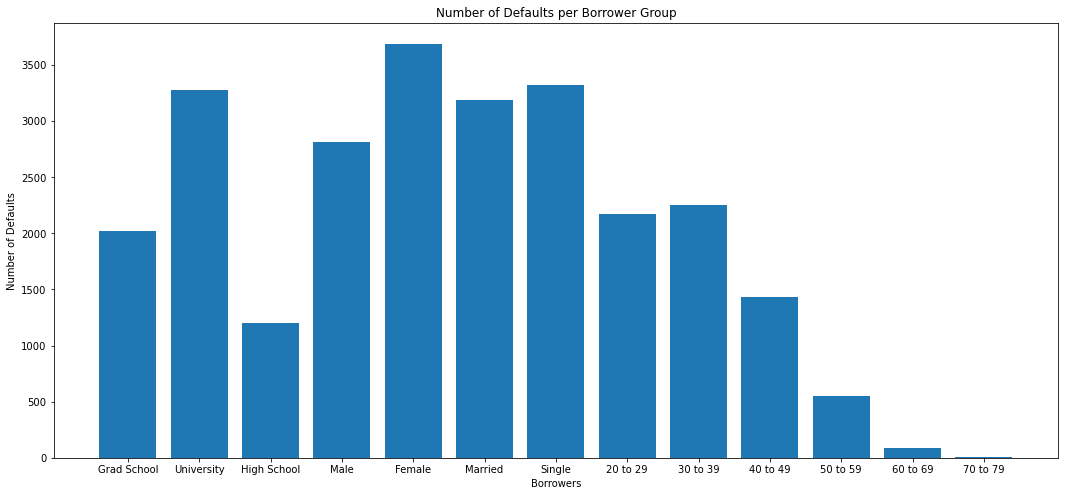

In [56]:
# Creating Bar Graph of total defaults per group

plt.figure(figsize=(18, 8))
plt.bar(Default_DF['Borrowers'], Default_DF['Total Defaults'])
plt.xlabel('Borrowers')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults per Borrower Group')
plt.show()


The female demographic had the most defaults out of all the different demographics

In [57]:
# Reviewing group data

gs['amount'].describe()


count     10512.00
mean     227433.76
std      392665.08
min           0.00
25%         530.25
50%       42595.00
75%      280316.25
max     4116080.00
Name: amount, dtype: float64

In [58]:
hs['amount'].describe()


count      4766.00
mean     224047.02
std      314680.50
min           0.00
25%       14060.75
50%      115667.50
75%      281297.25
max     3279917.00
Name: amount, dtype: float64

In [59]:
uni['amount'].describe()


count     13844.00
mean     253938.28
std      351747.02
min           0.00
25%       16909.75
50%      126170.00
75%      330269.25
max     3169258.00
Name: amount, dtype: float64

In [60]:
# Adding Total Borrowers to Default_DF data frame

Default_DF['Total Borrowers'] = [10512, 13844, 4766, 11561,
                                 17561, 13406, 15716, 9419, 10967, 6191, 2217, 303,25]


In [61]:
Default_DF


,Borrowers,Total Defaults,Total Borrowers
0,Grad School,2018,10512
1,University,3281,13844
2,High School,1204,4766
3,Male,2812,11561
4,Female,3691,17561
5,Married,3185,13406
6,Single,3318,15716
7,20 to 29,2173,9419
8,30 to 39,2252,10967
9,40 to 49,1432,6191


In [62]:
# Creating rate of default column

Default_DF['Rate of Default'] = (
    (Default_DF['Total Defaults']/Default_DF['Total Borrowers'])*100)


In [63]:
Default_DF


,Borrowers,Total Defaults,Total Borrowers,Rate of Default
0,Grad School,2018,10512,19.20
1,University,3281,13844,23.70
2,High School,1204,4766,25.26
3,Male,2812,11561,24.32
4,Female,3691,17561,21.02
5,Married,3185,13406,23.76
6,Single,3318,15716,21.11
7,20 to 29,2173,9419,23.07
8,30 to 39,2252,10967,20.53
9,40 to 49,1432,6191,23.13


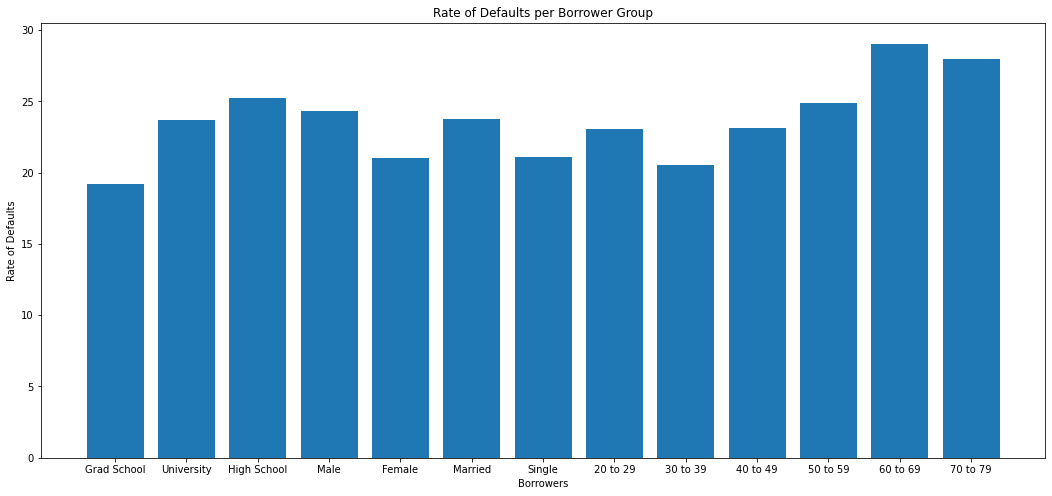

In [64]:
# Plotting Rate of Default

plt.figure(figsize=(18, 8))
plt.bar(Default_DF['Borrowers'], Default_DF['Rate of Default'])
plt.xlabel('Borrowers')
plt.ylabel('Rate of Defaults')
plt.title('Rate of Defaults per Borrower Group')
plt.show()


The default rate is fairly consisten across the different demographics with the exception of the two oldest age brackets. However these were smaller sample sizes.

# Running the KNN and logistic regression models

Since we have powerful computers at our disposal, we pull all the possible combinations of inputs and run the model across each subset of inputs. Furthermore, we use k values of 1, 5, 10, 25, 50 and 100 and see which one performs the best.

Running model for the following parameters:  ['delayed']


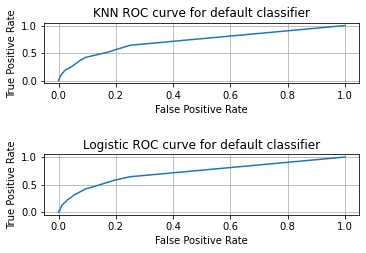

In [65]:
# THIS IS THE ACTUAL ALGORITHM, IT USES THE FUNCTIONS DEFINED ABOVE

# NOTE TO TA: BECAUSE WE RUN ACROSS ALL COMBINATIONS OF INPUTS/SUBSETS AND USE k=1,5,10,25,50,100
# THE MODEL TAKES MORE THAN 1.5 HOURS TO RUN. AS SUCH, WE HAVE COMMENTED OUT THE ACTUAL RUNS AND 
# SHORT CIRCUITED JUST TO SHOW THE BEST PERFORMING OUTPUT THAT WE MOVE FORWARD WITH. 
# IF YOU'D LIKE TO RUN THE FULL MODEL FOR 1.5 HOURS, PLEASE REPLACE THE COMMENTED LINES AS INDICATED BELOW

input_combinations = get_combinations_for(data.columns)

knn_classification_reports = {}
logistic_regression_reports = {}

# for input_combination in input_combinations:  ######### UNCOMMENT THIS LINE AND COMMENT OUT THE NEXT ONE TO RUN THE FULL MODEL
for input_combination in [["delayed"]]:
    print("Running model for the following parameters: ", input_combination)

    # for i in [1, 5, 10, 25, 50, 100]: ######### UNCOMMENT THIS LINE AND COMMENT OUT THE NEXT ONE TO RUN THE FULL MODEL
    for i in [25]:
        knn_classification_reports[", ".join(
            input_combination) + "_" + str(i)] = run_knn_for(data, input_combination, i)

    logistic_regression_reports[", ".join(
        input_combination)] = run_logistic_regression_for(data, input_combination)

scenario_reports = {"knn": knn_classification_reports,
                    "logistic": logistic_regression_reports}


In [66]:
# Let's explore the structure of the Dict that has the results from all of 
# the scenarios we considered

print("Number of KNN scenarios: ", len(scenario_reports["knn"]))
print("Number of logistic regression scenarios: ", len(scenario_reports["logistic"]))

knn_reports = scenario_reports["knn"]
logistic_reports = scenario_reports["logistic"]

scenario_reports



Number of KNN scenarios:  1
Number of logistic regression scenarios:  1


{'knn': {'delayed_25': '              precision    recall  f1-score   support\n\n         0.0       0.84      0.93      0.88      4552\n         1.0       0.58      0.36      0.44      1273\n\n    accuracy                           0.80      5825\n   macro avg       0.71      0.64      0.66      5825\nweighted avg       0.78      0.80      0.78      5825\n'},
 'logistic': {'delayed': '              precision    recall  f1-score   support\n\n         0.0       0.82      0.97      0.89      4552\n         1.0       0.67      0.23      0.34      1273\n\n    accuracy                           0.81      5825\n   macro avg       0.74      0.60      0.61      5825\nweighted avg       0.78      0.81      0.77      5825\n'}}

In [67]:
knn_classification_reports

{'delayed_25': '              precision    recall  f1-score   support\n\n         0.0       0.84      0.93      0.88      4552\n         1.0       0.58      0.36      0.44      1273\n\n    accuracy                           0.80      5825\n   macro avg       0.71      0.64      0.66      5825\nweighted avg       0.78      0.80      0.78      5825\n'}

### KNN Summary
We note that the best performance for our model uses ONLY delayed as an input parameter, with a k=25, leading to a f1-score of 0.44 for the "1" or default case, and an f1-score of 0.88 for the "0" or no default case

We note that this model has value, but 0.44 is not good enough to make a decision about credit or to be actionable. 

In [68]:
logistic_reports

{'delayed': '              precision    recall  f1-score   support\n\n         0.0       0.82      0.97      0.89      4552\n         1.0       0.67      0.23      0.34      1273\n\n    accuracy                           0.81      5825\n   macro avg       0.74      0.60      0.61      5825\nweighted avg       0.78      0.81      0.77      5825\n'}

### Logistic regression summary

We note that the best performance for our model uses only delayed as an input parameter, and produces an f1-score of 0.88 for the "0" or no default case and 0.34 for the "1" or default case.

The KNN model is slightly better than the logistic regression model, but not materially so. We note that this model has some value, but 0.34 is not good enough to make a decision about credit or to be actionable. 

# Using a decision tree
Next, we considered whether a decision tree algorithm might offer additional insight. We concluded that the decision tree algorithm was worthwhile, even if quite leafy.

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [102]:
df = pd.read_csv('credit.csv',index_col="id")

In [103]:
df.head()

,credit,delayed,amount,gender,education,age,marital,default
id,,,,,,,,
25780,180000,2,699,Female,graduate school,39,married,1.00
7679,50000,0,15925,Female,graduate school,25,single,0.00
19690,210000,1,0,Male,univeristy,35,single,0.00
906,50000,0,26889,Female,univeristy,38,married,0.00
191,50000,4,276076,Female,univeristy,24,single,0.00


In [104]:
df.corr()

,credit,delayed,amount,age,default
credit,1.00,-0.23,0.26,0.15,-0.15
delayed,-0.23,1.00,0.04,-0.01,0.38
amount,0.26,0.04,1.00,0.05,0.00
age,0.15,-0.01,0.05,1.00,0.01
default,-0.15,0.38,0.00,0.01,1.00


In [105]:
df = pd.get_dummies(df)

In [106]:
df.head()

,credit,delayed,amount,age,default,gender_Female,gender_Male,education_graduate school,education_highschool,education_univeristy,marital_married,marital_single
id,,,,,,,,,,,,
25780,180000,2,699,39,1.00,1,0,1,0,0,1,0
7679,50000,0,15925,25,0.00,1,0,1,0,0,0,1
19690,210000,1,0,35,0.00,0,1,0,0,1,0,1
906,50000,0,26889,38,0.00,1,0,0,0,1,1,0
191,50000,4,276076,24,0.00,1,0,0,0,1,0,1


In [107]:
df.isnull().sum()

credit                        0
delayed                       0
amount                        0
age                           0
default                      20
gender_Female                 0
gender_Male                   0
education_graduate school     0
education_highschool          0
education_univeristy          0
marital_married               0
marital_single                0
dtype: int64

In [108]:
df.dropna(inplace=True)

In [109]:
df.corr().sort_values(by=['default'])

,credit,delayed,amount,age,default,gender_Female,gender_Male,education_graduate school,education_highschool,education_univeristy,marital_married,marital_single
credit,1.00,-0.23,0.26,0.15,-0.15,0.02,-0.02,0.26,-0.14,-0.15,0.10,-0.10
education_graduate school,0.26,-0.09,-0.02,-0.10,-0.06,-0.02,0.02,1.00,-0.33,-0.72,-0.16,0.16
gender_Female,0.02,-0.05,-0.03,-0.09,-0.04,1.00,-1.00,-0.02,-0.01,0.03,0.03,-0.03
marital_single,-0.10,-0.01,-0.02,-0.46,-0.03,-0.03,0.03,0.16,-0.12,-0.06,-1.00,1.00
amount,0.26,0.04,1.00,0.05,0.00,-0.03,0.03,-0.02,-0.02,0.04,0.02,-0.02
age,0.15,-0.01,0.05,1.00,0.01,-0.09,0.09,-0.10,0.23,-0.08,0.46,-0.46
education_univeristy,-0.15,0.05,0.04,-0.08,0.03,0.03,-0.03,-0.72,-0.42,1.00,0.06,-0.06
education_highschool,-0.14,0.04,-0.02,0.23,0.03,-0.01,0.01,-0.33,1.00,-0.42,0.12,-0.12
marital_married,0.10,0.01,0.02,0.46,0.03,0.03,-0.03,-0.16,0.12,0.06,1.00,-1.00
gender_Male,-0.02,0.05,0.03,0.09,0.04,-1.00,1.00,0.02,0.01,-0.03,-0.03,0.03


In [110]:
# Define features and target variables
X = df.drop(['default','credit','amount','age'],axis=1)
y = df['default']

In [111]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

Decision Tree

In [112]:
# Classify and fit the model
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)

In [113]:
# Making predictions using the testing data
y_pred = DT.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4275,  252],
       [ 908,  394]])

In [115]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7951621204323212

In [137]:
# Create a classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      4527
         1.0       0.61      0.30      0.40      1302

    accuracy                           0.80      5829
   macro avg       0.72      0.62      0.64      5829
weighted avg       0.78      0.80      0.77      5829



Logistic Regression

In [117]:
# Create and train LR model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [118]:
# Execute LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,1.00


In [133]:
# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[4375,  152],
       [1008,  294]])

In [138]:
# Create a classification report
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4527
         1.0       0.66      0.23      0.34      1302

    accuracy                           0.80      5829
   macro avg       0.74      0.60      0.61      5829
weighted avg       0.78      0.80      0.76      5829



### Simplifying our decision tree

Interestingly, as we experiment with different input parameters, we find we get the best results with a single input parameter -- delay. See below.

In [121]:
df = pd.read_csv('credit.csv',index_col="id")
df = pd.get_dummies(df)
df.dropna(inplace=True)
df.corr().sort_values(by=['default'])

# Define features and target variables
X = df['delayed']
y = df['default']

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# Classify and fit the model
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)



In [122]:
# Making predictions using the testing data
y_pred = DT.predict(X_test)
y_pred



array([0., 0., 0., ..., 1., 0., 0.])

In [123]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[4275,  252],
       [ 908,  394]])

In [124]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)
acc_score


0.8009950248756219

In [125]:
# Create a classification report
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      4527
         1.0       0.61      0.30      0.40      1302

    accuracy                           0.80      5829
   macro avg       0.72      0.62      0.64      5829
weighted avg       0.78      0.80      0.77      5829



Logistic Regression

In [127]:
# Create and train LR model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=1)

In [128]:
# Execute LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,1.00


In [129]:
# Create a confusion matrix
confusion_matrix(y_test, predictions)

array([[4375,  152],
       [1008,  294]])

In [141]:
# Create a classification report
target_names = ["No credit", "credit"]
cr = classification_report(y_test, predictions,target_names=target_names)
print(cr)

              precision    recall  f1-score   support

   No credit       0.81      0.97      0.88      4527
      credit       0.66      0.23      0.34      1302

    accuracy                           0.80      5829
   macro avg       0.74      0.60      0.61      5829
weighted avg       0.78      0.80      0.76      5829



# Conclusion

Having considered a large number of scenarios using KNN, logistic regression, and decision tree, we see that we consistently get the best results with a single input parameter -- delayed. 

This intuitively makes sense -- the delay in payment is likely a direct indicator of ability or willingness to pay. It reinforces the idea that simplified models can often be more effective.

Our data exploration showed that the rate of default amongst the different demographcis only varied slightly, between 19-25%. These variables were not good predicator variables for default. 

While delayed was the best predictor variable the model was still not very good at determining default.

Additional data or variables may bring more value to this model and increase its prediction capability.

The rate of false positives and false negatives is too great to use this model as it is now to grant or deny credit.


